In [10]:
import math
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from matplotlib import cm, figure, rc, pyplot
import numpy as np
%matplotlib inline
plt.style.use('/Users/alessandrobaccarini/.config/matplotlib/stylelib/dracula.mplstyle')

plt.rcParams["text.usetex"] = True
plt.rcParams.update(
    {
        "font.size": 8,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsfonts,amsmath,amssymb}",
    }
)
rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size": 16})
rc("text", usetex=True)

plt.rcParams['figure.dpi'] = 150
pi = math.pi
e = math.e

In [11]:
def mean(mu, sigma_sq):
    return math.exp(mu + 0.5*sigma_sq)
def var(mu, sigma_sq):
    return (math.exp(sigma_sq) - 1)*(math.exp(2*mu + sigma_sq))
def fw_approx(mu, sigma_sq, n):
    new_sigma_sq = math.log((1/n)*(math.exp(sigma_sq) - 1) + 1)
    new_mu = math.log(n*math.exp(mu)) + 0.5 * (sigma_sq - new_sigma_sq)
    return new_mu, new_sigma_sq
def ln_diff_ent(mu, sigma_sq):
    return (mu + 0.5)*math.log2(e) + 0.5*math.log2(2 * pi * sigma_sq)

In [12]:

mu =  1.6702
sigma_sq = 0.145542
# mu =  0
# sigma_sq = 4.0
sigma = math.sqrt(sigma_sq)
ln_mean = mean(mu, sigma_sq)
ln_var = var(mu, sigma_sq)
# print("(mean, variance) = ",ln_mean, ln_var)

print("(mu,   sigma_sq   -> sigma  ) = ",mu,sigma_sq, sigma )
n = 1

mu_1, sigma_sq_1 = fw_approx(mu, sigma_sq, n)
sigma_1 = math.sqrt(sigma_sq_1)
print("(mu_1, sigma_sq_1 -> sigma_1) = ",mu_1,sigma_sq_1, sigma_1 )

n+=1
mu_2, sigma_sq_2 = fw_approx(mu, sigma_sq, n)
sigma_2 = math.sqrt(sigma_sq_2)
print("(mu_2, sigma_sq_2 -> sigma_2) = ",mu_2,sigma_sq_2, sigma_2 )


h_X_T = ln_diff_ent(mu, sigma_sq)
h_X_S = ln_diff_ent(mu_1, sigma_sq_1)
h_X_T_S = ln_diff_ent(mu_2, sigma_sq_2)

print(r"h(X_T)       = ", h_X_T)
print(r"h(X_S)       = ", h_X_S)
print(r"h(X_T + X_S) = ", h_X_T_S)

print('awae = ', h_X_T + h_X_S - h_X_T_S)



(mu,   sigma_sq   -> sigma  ) =  1.6702 0.145542 0.3814996723458619
(mu_1, sigma_sq_1 -> sigma_1) =  1.6702 0.14554199999999998 0.3814996723458619
(mu_2, sigma_sq_2 -> sigma_2) =  2.398409942784532 0.07541647555082702 0.2746206029248844
h(X_T)       =  3.0664385655758357
h(X_S)       =  3.0664385655758357
h(X_T + X_S) =  3.6427814859556884
awae =  2.490095645195983


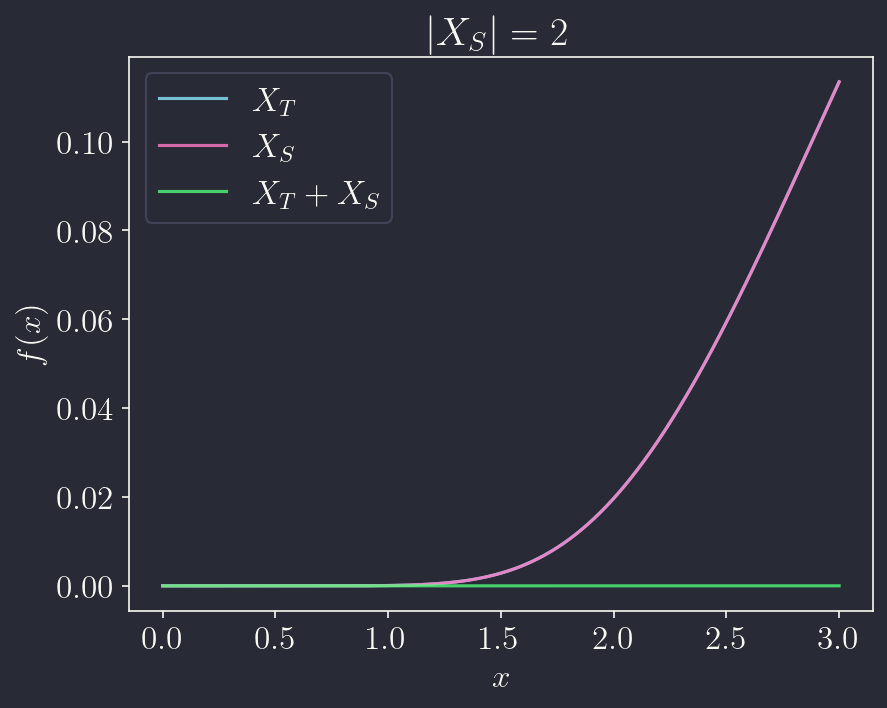

In [13]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 3, 1000)
ax.plot(x, lognorm.pdf(x, sigma, scale=math.exp(mu)),
       '-',  alpha=0.8, label=r'$X_T$')
ax.plot(x, lognorm.pdf(x, sigma_1, scale=math.exp(mu_1)),
       '-',  alpha=0.8, label=r'$X_S$')
ax.plot(x, lognorm.pdf(x, sigma_2, scale=math.exp(mu_2)),
       '-',  alpha=0.8, label=r'$X_T + X_S$')

plt.title(r"$\lvert X_S \rvert = %s$"%n )
plt.ylabel(r"$f(x)$")
plt.xlabel(r"$x$")

ax.legend( loc='best' )
plt.show()

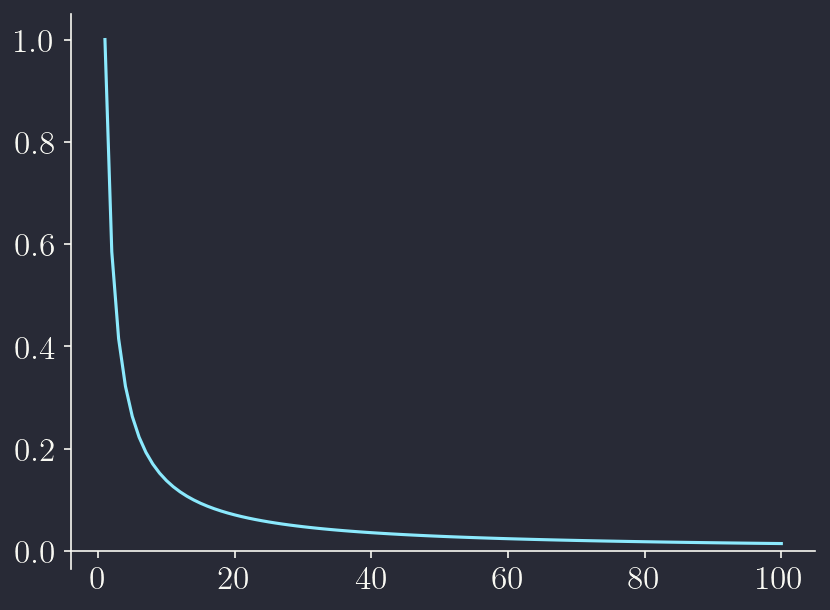

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# 100 linearly spaced numbers
x = np.linspace(1,100,100)

# the function, which is y = x^2 here
y = np.log2((1/x +1))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y)

# show the plot
plt.show()